In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
root_dir = '/Users/courtino/repos/personal/algorithmicProblems/src/main/java/miscellaneous/throttler/'
traffic1 = pd.read_csv(root_dir + 'traffic1.tsv', delimiter='\t')
traffic2 = pd.read_csv(root_dir + 'traffic2.tsv', delimiter='\t')
traffic3 = pd.read_csv(root_dir + 'traffic3.tsv', delimiter='\t')
traffic4 = pd.read_csv(root_dir + 'traffic4.tsv', delimiter='\t')
traffic5 = pd.read_csv(root_dir + 'traffic5.tsv', delimiter='\t')
traffic6 = pd.read_csv(root_dir + 'traffic6.tsv', delimiter='\t')

scrambled_traffic1 = pd.read_csv(root_dir + 'scrambled-traffic1.tsv', delimiter='\t')
scrambled_traffic2 = pd.read_csv(root_dir + 'scrambled-traffic2.tsv', delimiter='\t')
scrambled_traffic3 = pd.read_csv(root_dir + 'scrambled-traffic3.tsv', delimiter='\t')
scrambled_traffic4 = pd.read_csv(root_dir + 'scrambled-traffic4.tsv', delimiter='\t')
scrambled_traffic5 = pd.read_csv(root_dir + 'scrambled-traffic5.tsv', delimiter='\t')
scrambled_traffic6 = pd.read_csv(root_dir + 'scrambled-traffic6.tsv', delimiter='\t')

throttling_algorithms = ['TokenBucketRateLimiter', 'SlidingWindowRateLimiter']
output_traffic_by_algorithm = { 
    algorithm: [pd.read_csv(f'{algorithm}-output-traffic{i}.tsv', delimiter='\t') for i in range(1, 7)] 
    for algorithm in throttling_algorithms 
}

<Axes: xlabel='time'>

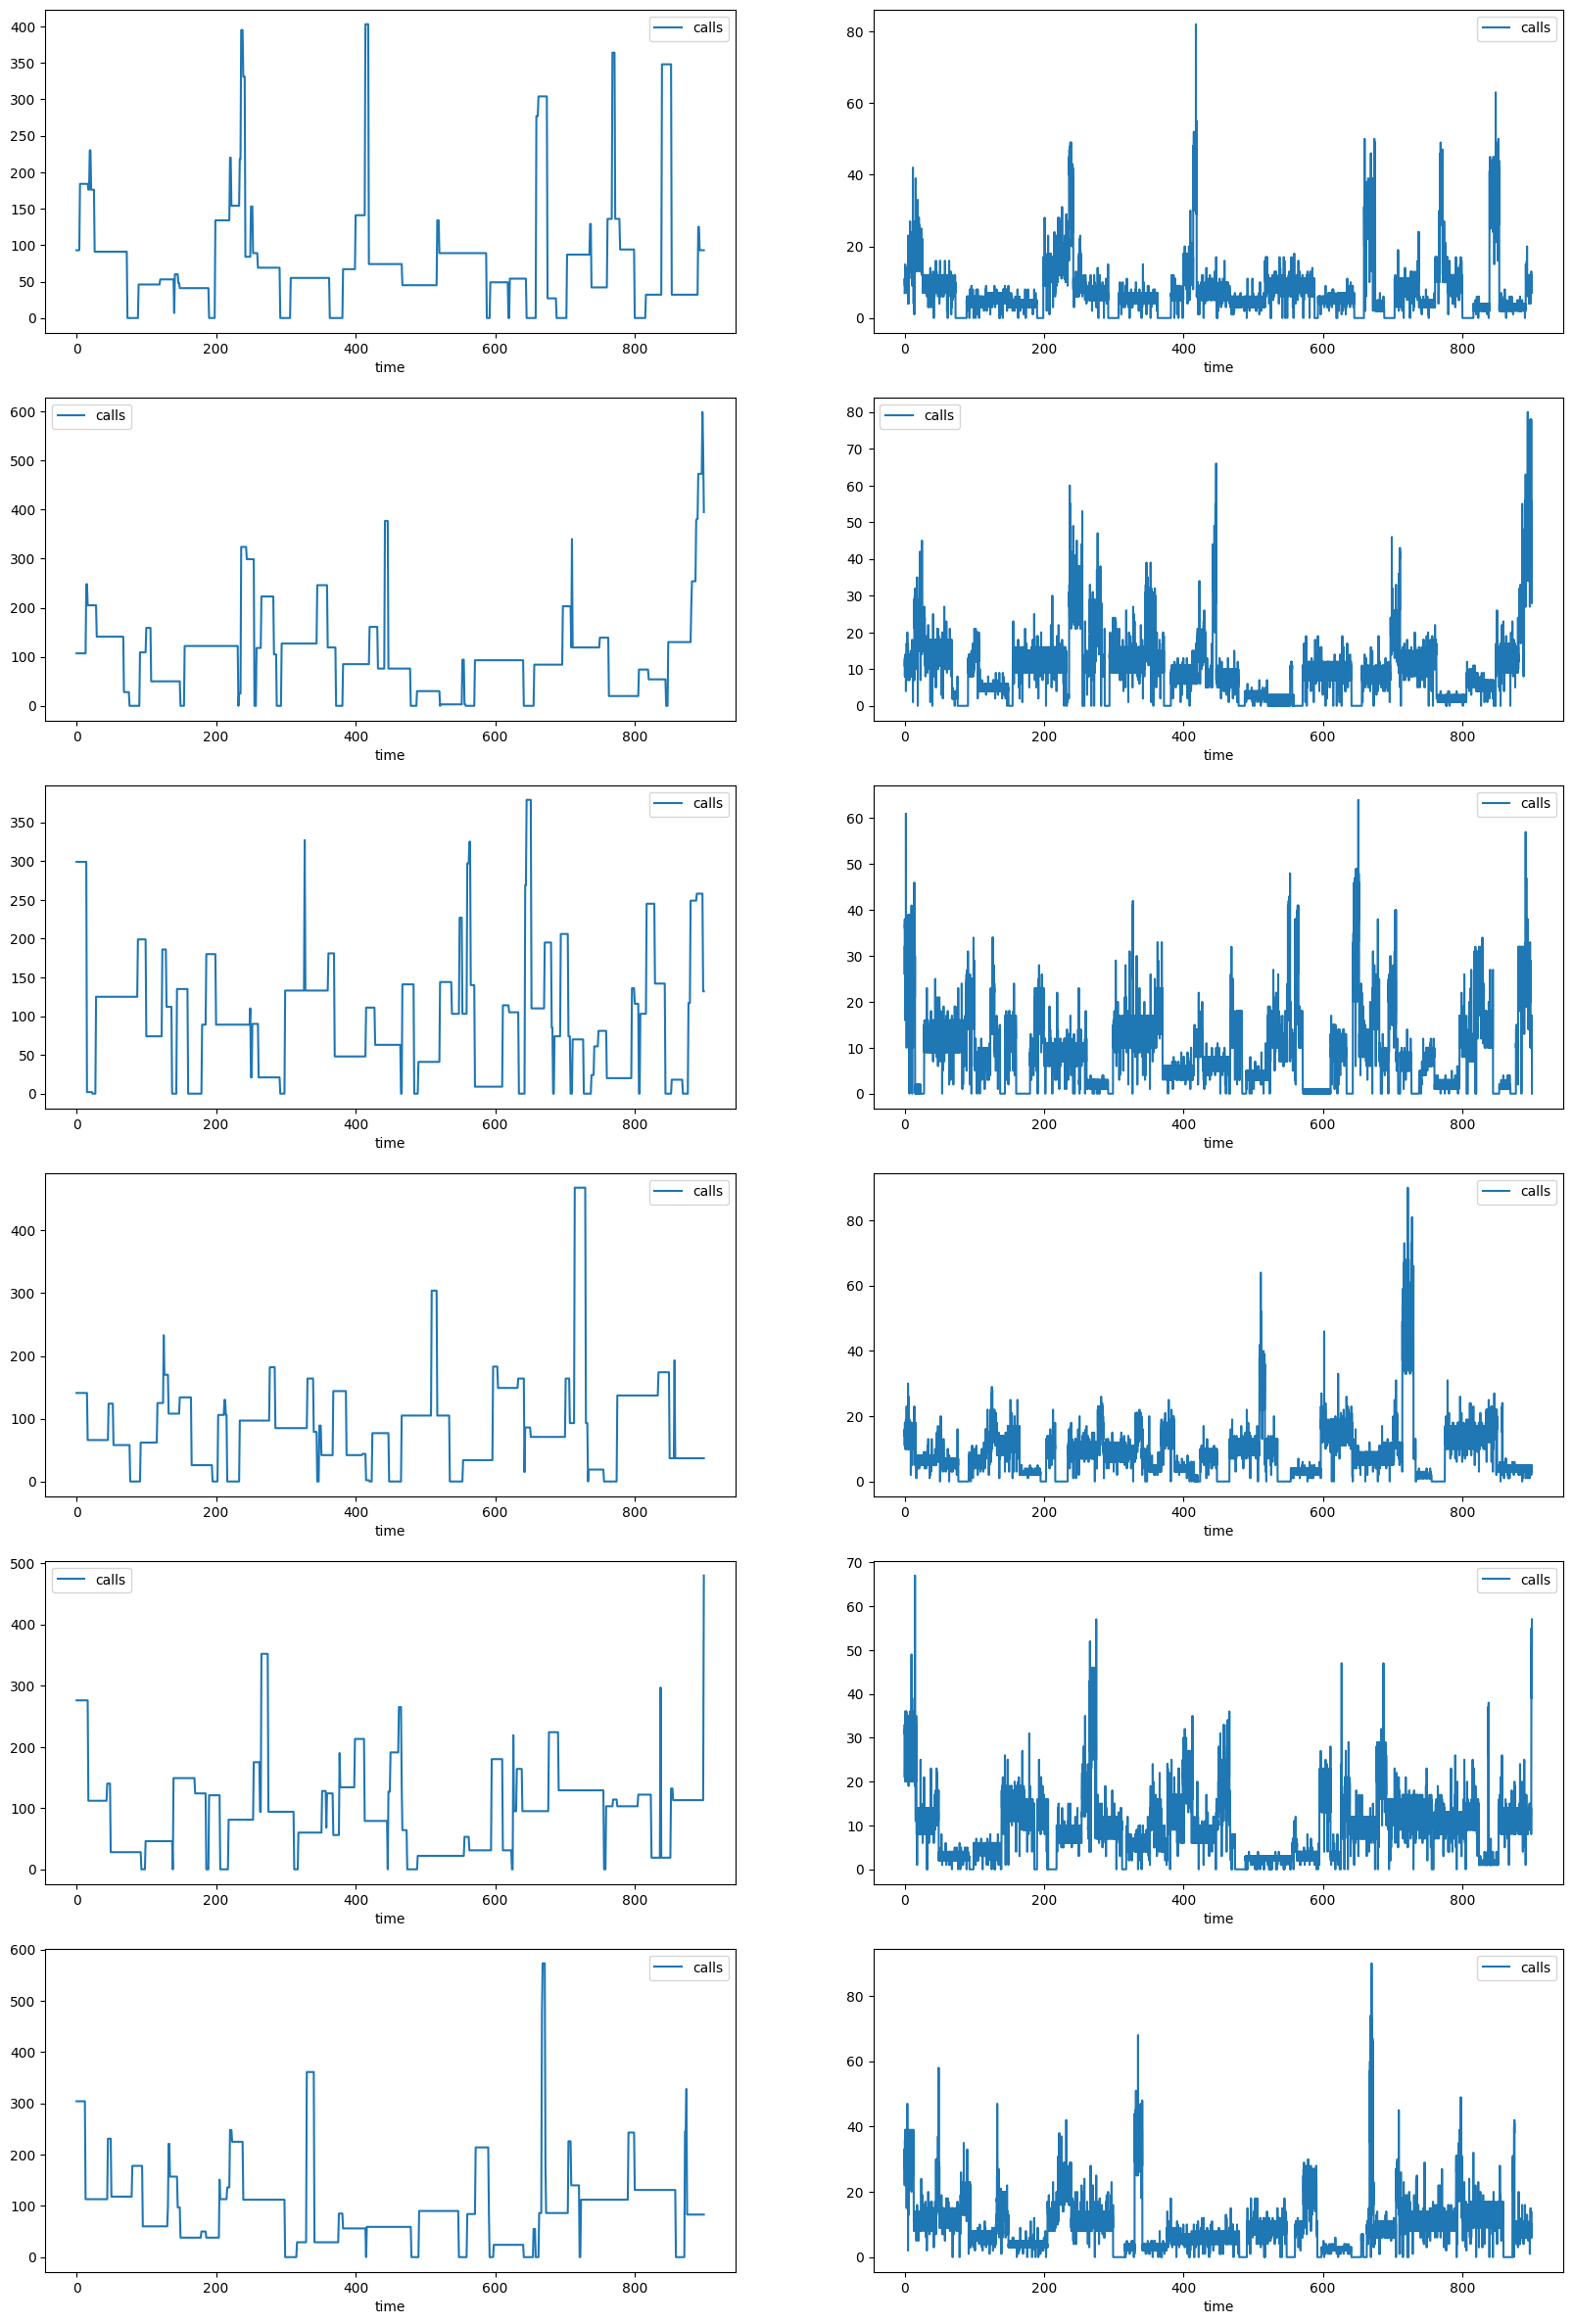

In [3]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))

traffic1.plot(x='time', y='calls', ax=axes[0, 0])
scrambled_traffic1.plot(x='time', y='calls', ax=axes[0, 1])

traffic2.plot(x='time', y='calls', ax=axes[1, 0])
scrambled_traffic2.plot(x='time', y='calls', ax=axes[1, 1])

traffic3.plot(x='time', y='calls', ax=axes[2, 0])
scrambled_traffic3.plot(x='time', y='calls', ax=axes[2, 1])

traffic4.plot(x='time', y='calls', ax=axes[3, 0])
scrambled_traffic4.plot(x='time', y='calls', ax=axes[3, 1])

traffic5.plot(x='time', y='calls', ax=axes[4, 0])
scrambled_traffic5.plot(x='time', y='calls', ax=axes[4, 1])

traffic6.plot(x='time', y='calls', ax=axes[5, 0])
scrambled_traffic6.plot(x='time', y='calls', ax=axes[5, 1])


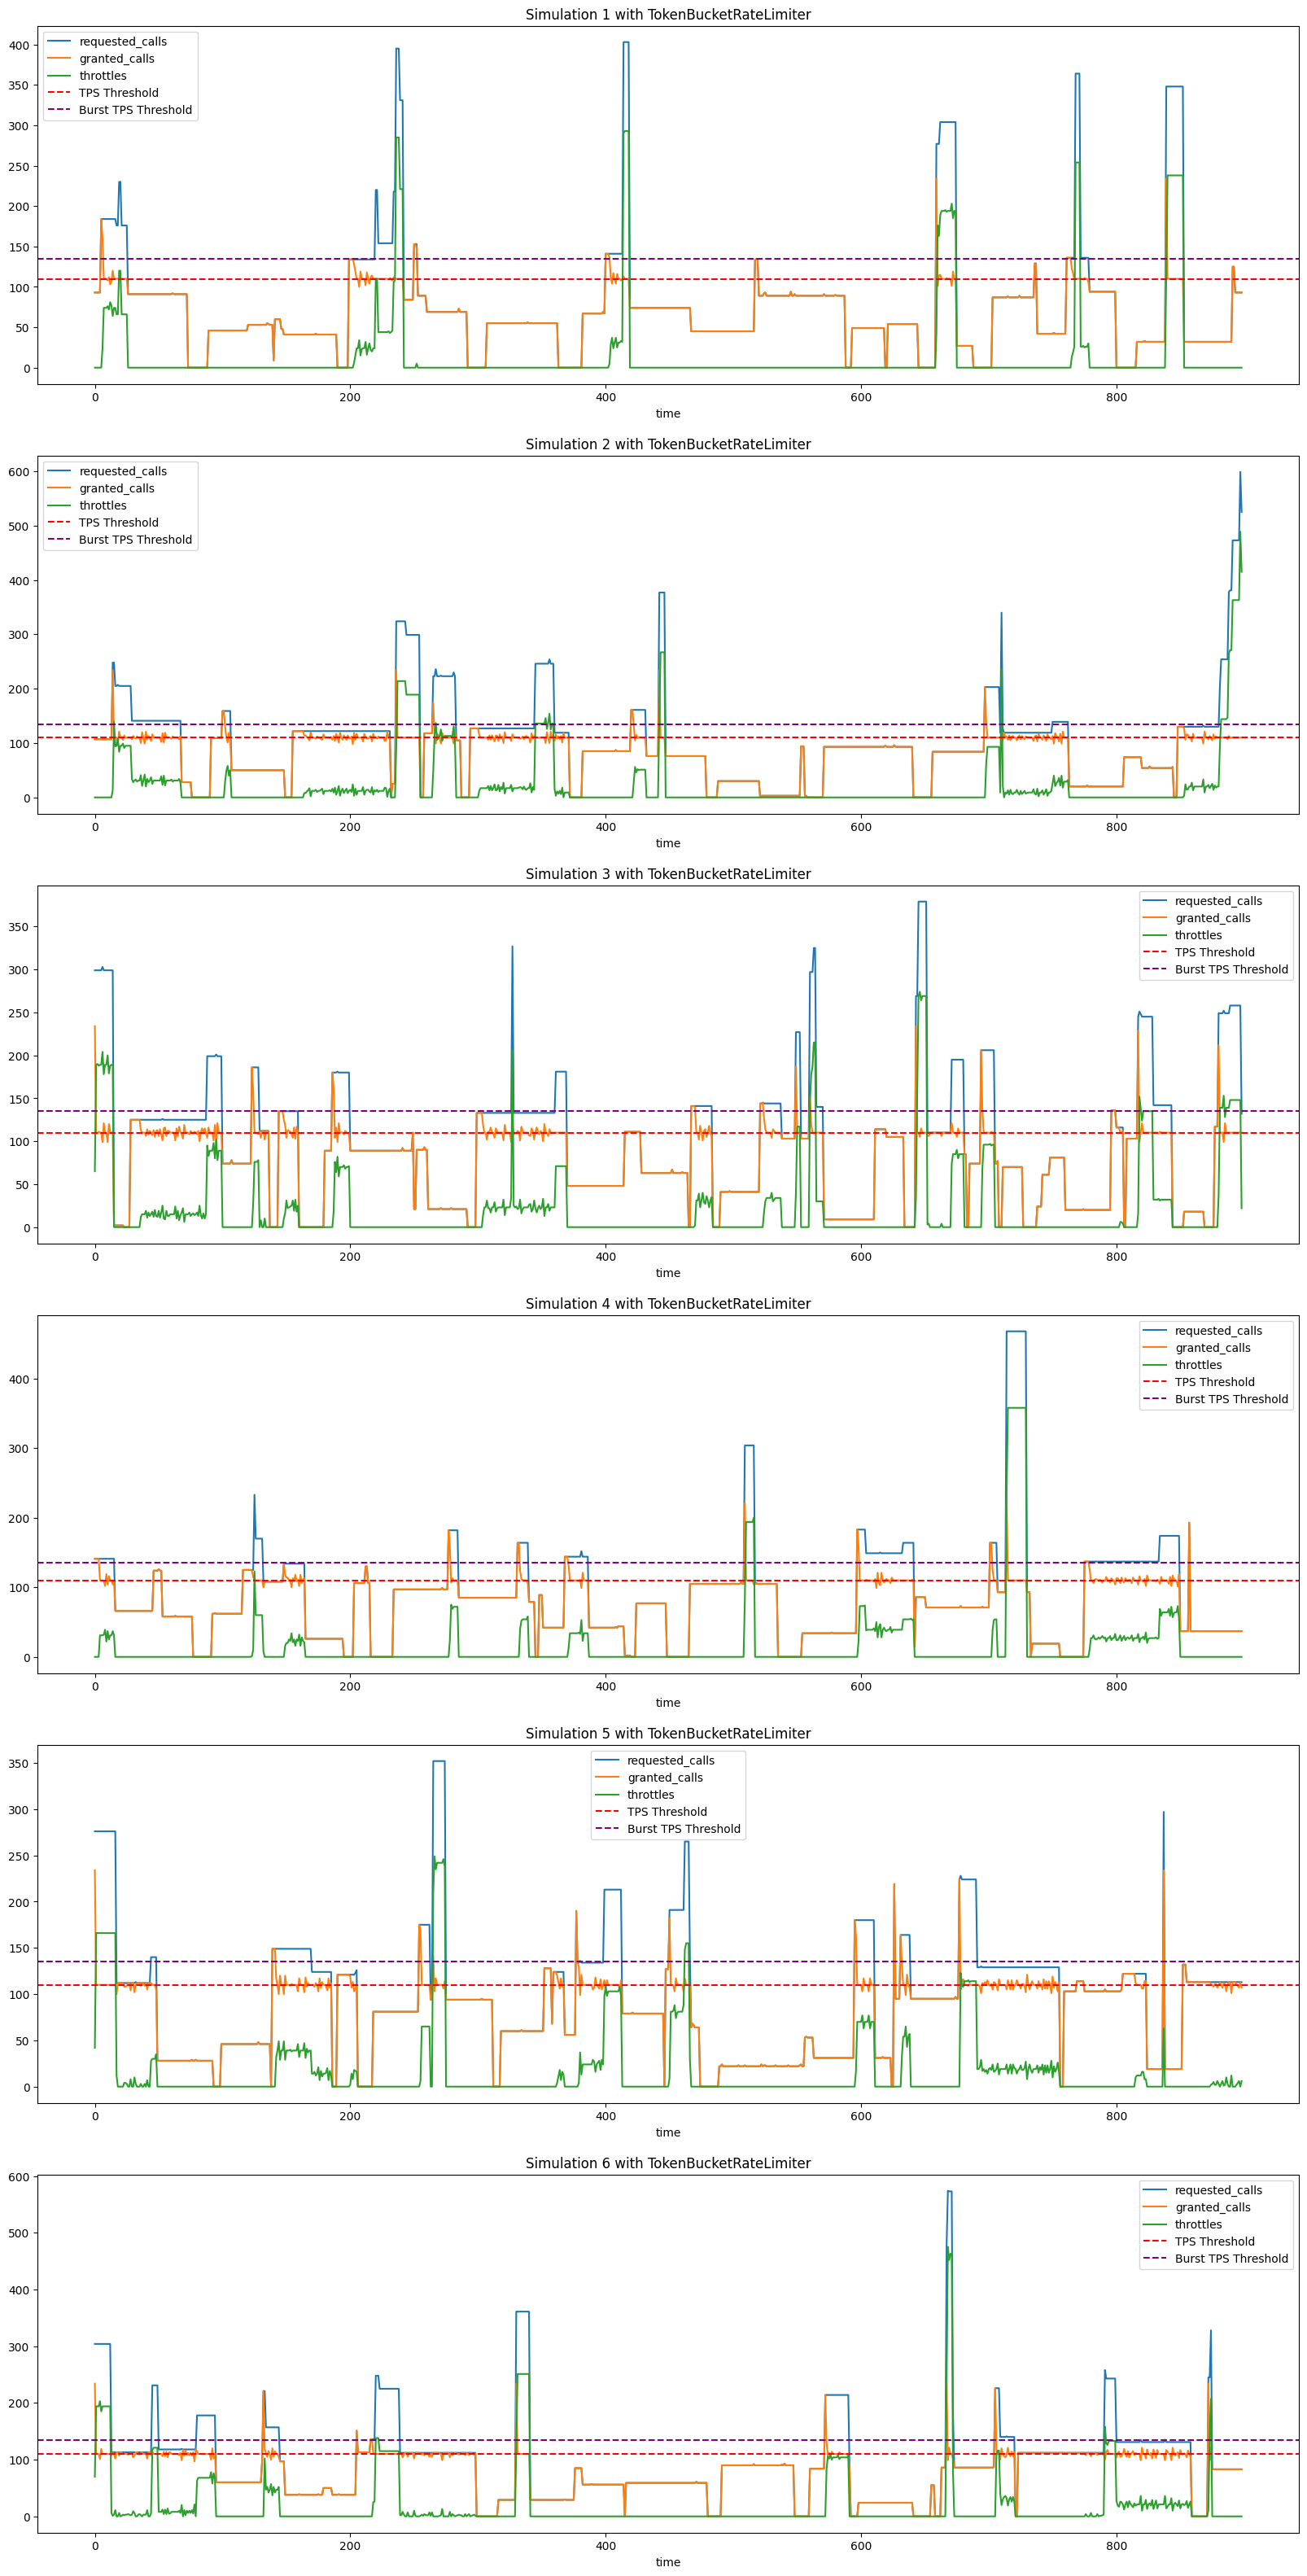

In [37]:
tps_threshold = 110
burst_tps_threshold = 135

def plot_output_traffic(algorithm, add_burst_threshold = False):
    simulations = output_traffic_by_algorithm[algorithm]
    main_fig, axes = plt.subplots(len(simulations), 1,  figsize=(20, 40))
    
    for i, df in enumerate(simulations):
        fig = df.plot(x='time', y=['requested_calls', 'granted_calls', 'throttles'], ax=axes[i])
        fig.set_title(f'Simulation {i + 1} with {algorithm}')
        fig.axhline(y=tps_threshold, color='r', linestyle='--', label='TPS Threshold')
        fig.axhline(y=burst_tps_threshold, color='purple', linestyle='--', label='Burst TPS Threshold')
        fig.legend()

    main_fig.figure.savefig(f'{root_dir}{algorithm}-output-traffic.png')

plot_output_traffic('TokenBucketRateLimiter', add_burst_threshold=True)


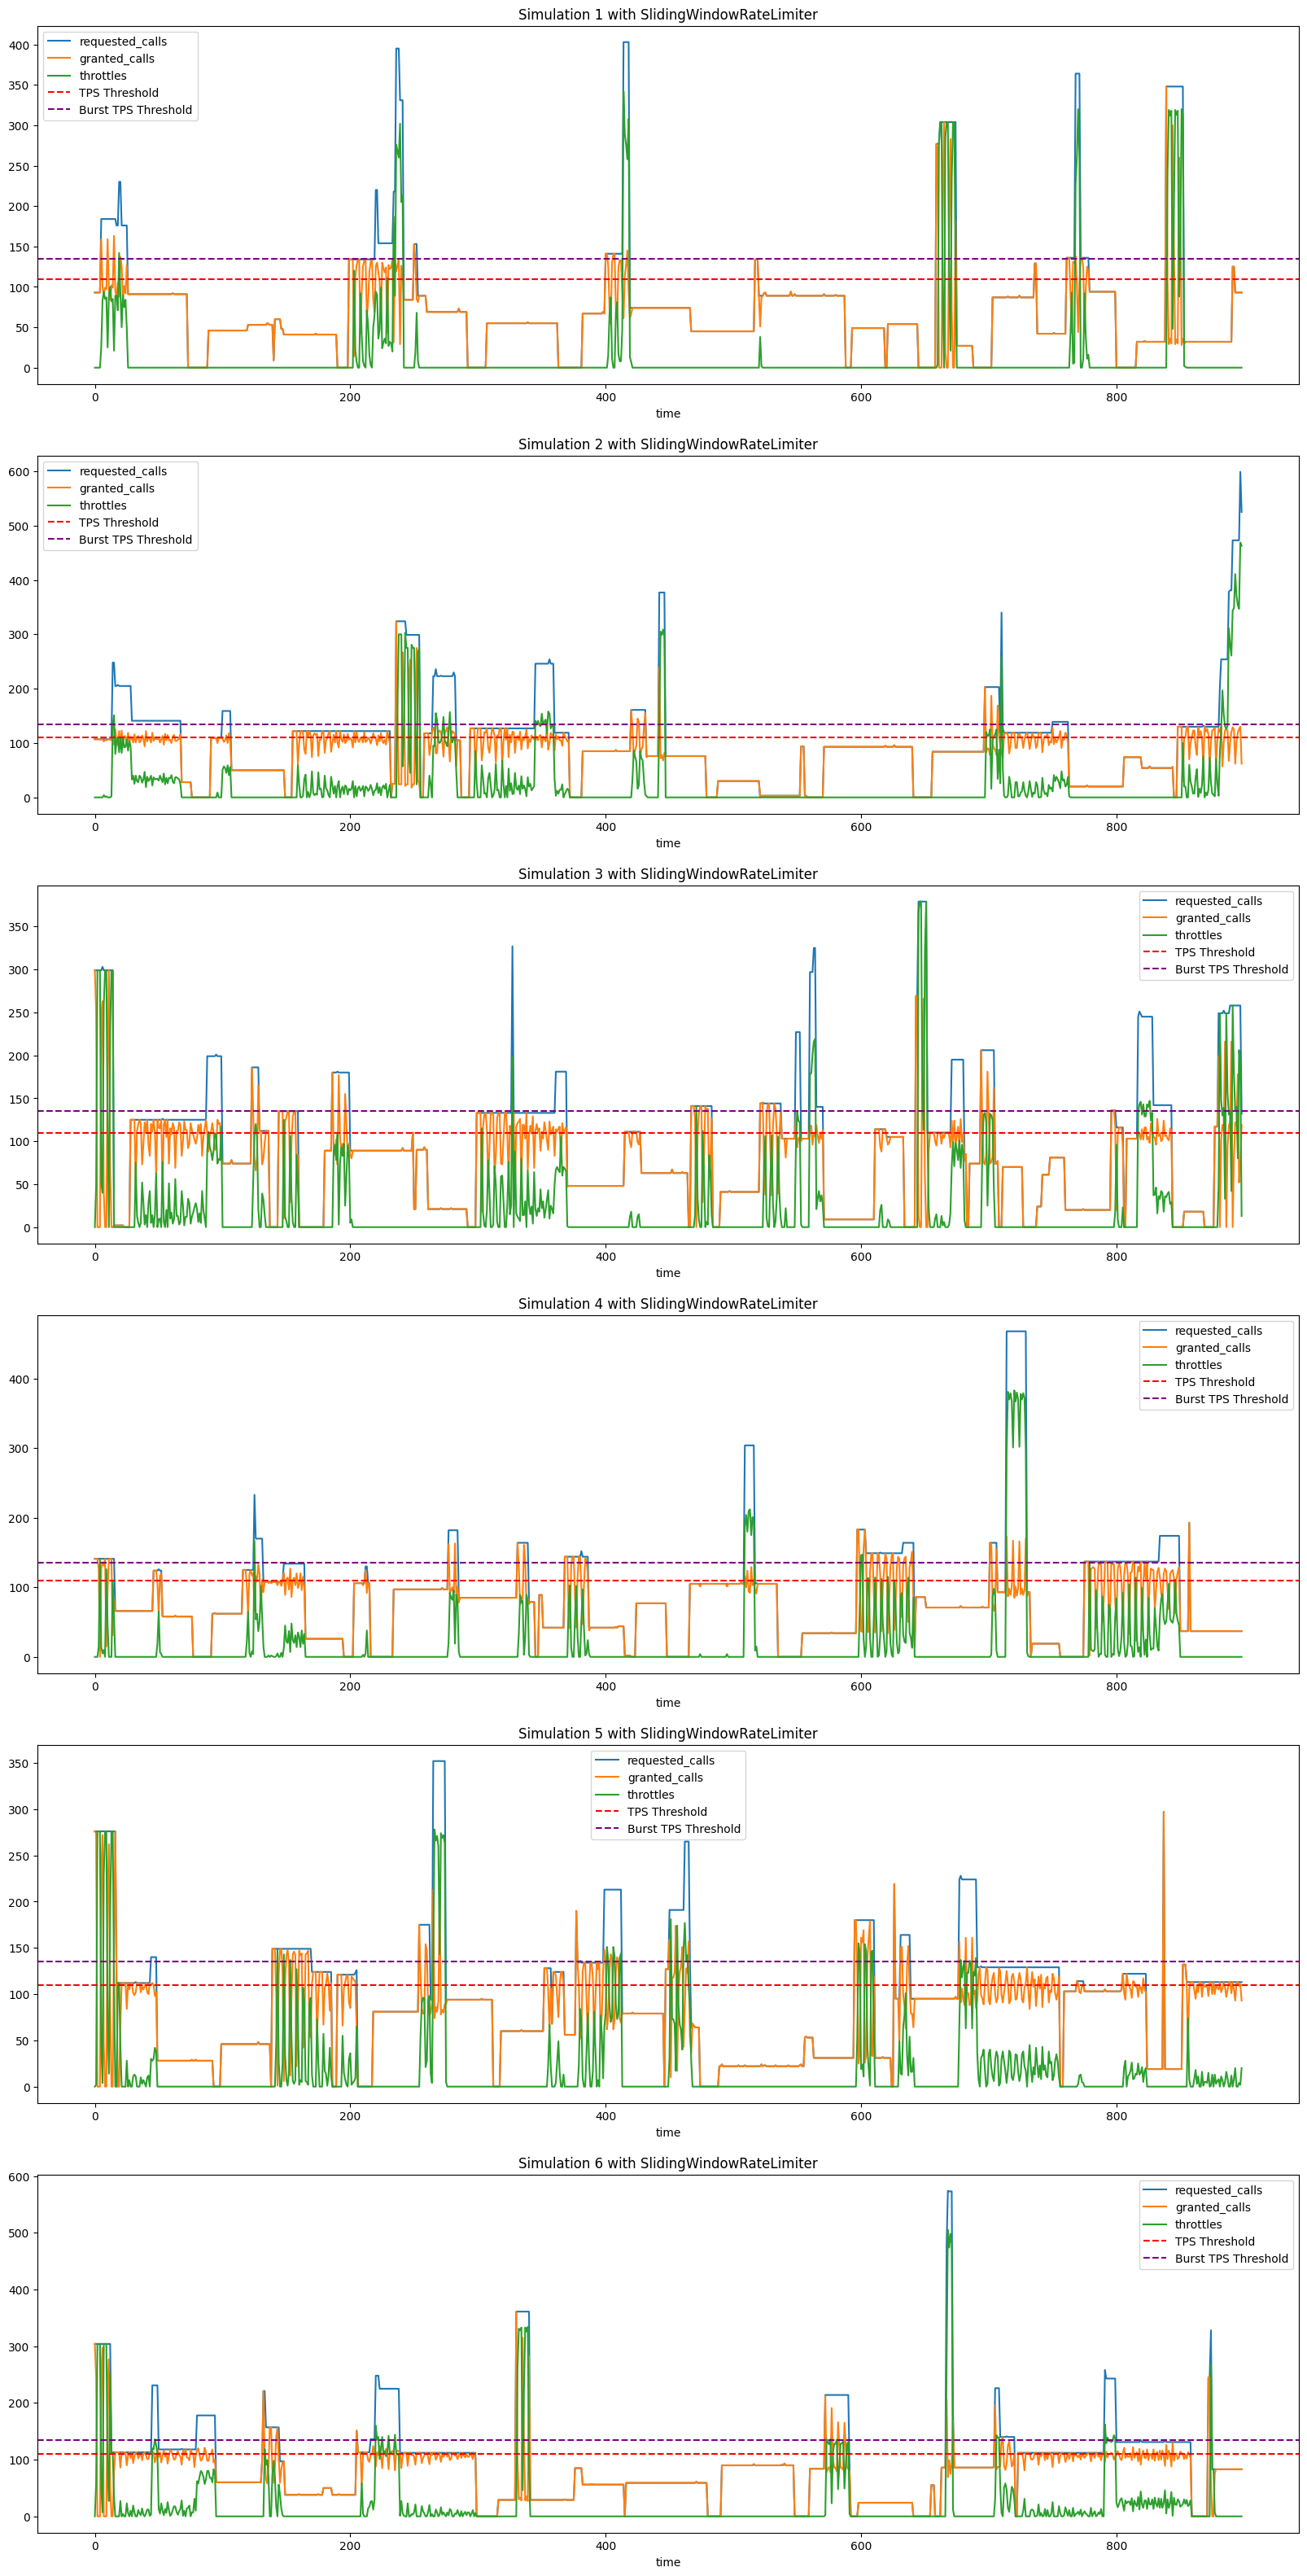

In [40]:
plot_output_traffic('SlidingWindowRateLimiter')